# Data Analytics Fast-Track: Exploring NBA Game Data & Fan Sentiments

## STEP 0: What is Data Science and Data Analytics?

You might hear the terms "data science" and "data analytics" a lot.
Here's a simple way to think about them:

- Data Science is the big field that uses many tools to collect, clean,
  analyze, and even predict things from data. It includes things like machine learning.

- Data Analytics is a part of data science focused on exploring and understanding data to find patterns and answer questions using statistics and visualization.

Today, we focus on Data Analytics!

We'll look at real sports data and use charts and numbers to find interesting insights.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


## STEP 1: Data Collection

We will be using two datasets:
1. NBA basketball game scores
2. Fan comments and their sentiments during a close game moment

In [4]:
df_nba = pd.read_csv('nba_data.csv')
df_senti = pd.read_csv('sentiment_ft_e.csv')

print("NBA Data Columns:")
print(df_nba.columns.to_list())

print("\nSentiment Data Columns:")
print(df_senti.columns.to_list())

NBA Data Columns:
['GAME_ID', 'GAME_DATE', 'HOME_TEAM', 'AWAY_TEAM', 'HOME_SCORE', 'AWAY_SCORE', 'DIFFERENCE']

Sentiment Data Columns:
['BEFORE_FT', 'DURING_FT', 'AFTER_FT', 'SENTIMENT_BEFORE_FT', 'SENTIMENTSCORE_BEFORE_FT', 'SENTIMENT_DURING_FT', 'SENTIMENTSCORE_DURING_FT', 'SENTIMENT_AFTER_FT', 'SENTIMENTSCORE_AFTER_FT']


## STEP 2: Data Cleaning & Understanding

First, let's check out the NBA dataset.


In [5]:
print("\n--- NBA Data Sample ---")
display(df_nba.head())

print("""
- GAME_ID: unique number for each game
- GAME_DATE: when the game happened
- HOME_TEAM and AWAY_TEAM: teams playing
- HOME_SCORE and AWAY_SCORE: points scored by each team
- DIFFERENCE: margin of points (home score minus away score)
""")


--- NBA Data Sample ---


,GAME_ID,GAME_DATE,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,DIFFERENCE
0,21000001,2010-10-26,MIA,BOS,88,80,8
1,21000002,2010-10-26,PHX,POR,106,92,14
2,21000003,2010-10-26,HOU,LAL,112,110,2
3,21000004,2010-10-27,BOS,CLE,95,87,8
4,21000005,2010-10-27,NJN,DET,101,98,3



- GAME_ID: unique number for each game
- GAME_DATE: when the game happened
- HOME_TEAM and AWAY_TEAM: teams playing
- HOME_SCORE and AWAY_SCORE: points scored by each team
- DIFFERENCE: margin of points (home score minus away score)



In [6]:
display(df_senti.head())

,BEFORE_FT,DURING_FT,AFTER_FT,SENTIMENT_BEFORE_FT,SENTIMENTSCORE_BEFORE_FT,SENTIMENT_DURING_FT,SENTIMENTSCORE_DURING_FT,SENTIMENT_AFTER_FT,SENTIMENTSCORE_AFTER_FT
0,"Just one miss, that’s all we need!","Shhh, let him lock in for the first one.",Ball game! What a finish!,neutral,0.0,neutral,0.0,very happy,1.0
1,"Come on, knock these down and send us home happy!",Short! Leave it short!,We just gave that away.,very happy,1.0,angry,-0.5,angry,-0.5
2,"Box out, box out, no lane violations!",Money! One more and we’re up!,Clutch free throws under pressure!,neutral,0.0,very happy,1.0,very happy,1.0
3,"He’s clutch, this is his moment!","Timeout, make him think about the second!","Why foul there, man?",very happy,1.0,neutral,0.0,angry,-0.5
4,"Don’t foul the shooter, stay calm!","Don’t let the timeout rattle you, same routine.",United Center is rocking!,neutral,0.0,neutral,0.0,very happy,1.0


## STEP 3: Exploratory Data Analysis (EDA) - NBA Scores

Let's see how many points teams scored at home vs away.

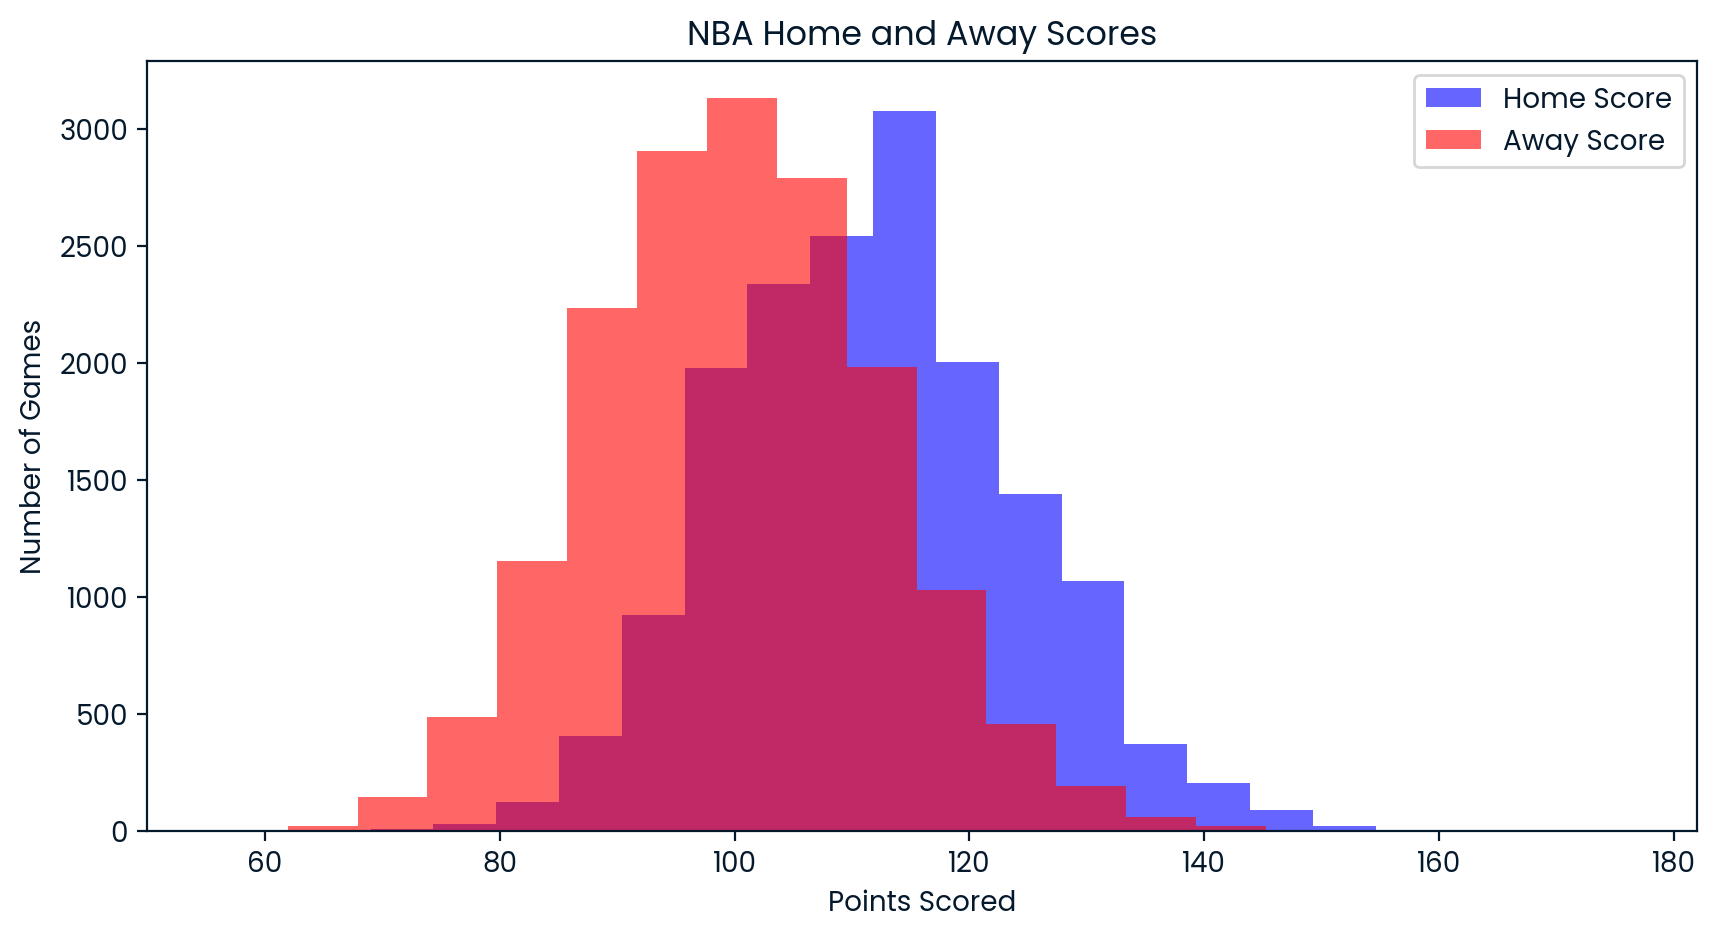

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('NBA Home and Away Scores')
plt.hist(df_nba['HOME_SCORE'], bins=20, alpha=0.6, label='Home Score', color='blue')
plt.hist(df_nba['AWAY_SCORE'], bins=20, alpha=0.6, label='Away Score', color='red')
plt.xlabel('Points Scored')
plt.ylabel('Number of Games')
plt.legend()
plt.show()




## STEP 4: Data Understanding - Fan Sentiment Data

Now, let's explore the fan sentiment data during an exciting finish
in a Lakers vs. Bulls game. The Bulls shoot 2 important free throws
while the score is 90-89 Lakers leading with 2 seconds left.

We have fan comments and sentiment info BEFORE, DURING, and AFTER the free throws.

In [10]:
print("\n--- Sentiment Data Sample ---")
display(df_senti.head())

print("""
- BEFORE_FT, DURING_FT, AFTER_FT: fans' comments at each moment
- SENTIMENT_BEFORE_FT, SENTIMENT_DURING_FT, SENTIMENT_AFTER_FT:
  emotional categories like 'angry' or 'very happy'
- SENTIMENTSCORE_BEFORE_FT, SENTIMENTSCORE_DURING_FT, SENTIMENTSCORE_AFTER_FT:
  numbers from -1 (angry) to 1 (very happy)
""")


--- Sentiment Data Sample ---


,BEFORE_FT,DURING_FT,AFTER_FT,SENTIMENT_BEFORE_FT,SENTIMENTSCORE_BEFORE_FT,SENTIMENT_DURING_FT,SENTIMENTSCORE_DURING_FT,SENTIMENT_AFTER_FT,SENTIMENTSCORE_AFTER_FT
0,"Just one miss, that’s all we need!","Shhh, let him lock in for the first one.",Ball game! What a finish!,neutral,0.0,neutral,0.0,very happy,1.0
1,"Come on, knock these down and send us home happy!",Short! Leave it short!,We just gave that away.,very happy,1.0,angry,-0.5,angry,-0.5
2,"Box out, box out, no lane violations!",Money! One more and we’re up!,Clutch free throws under pressure!,neutral,0.0,very happy,1.0,very happy,1.0
3,"He’s clutch, this is his moment!","Timeout, make him think about the second!","Why foul there, man?",very happy,1.0,neutral,0.0,angry,-0.5
4,"Don’t foul the shooter, stay calm!","Don’t let the timeout rattle you, same routine.",United Center is rocking!,neutral,0.0,neutral,0.0,very happy,1.0



- BEFORE_FT, DURING_FT, AFTER_FT: fans' comments at each moment
- SENTIMENT_BEFORE_FT, SENTIMENT_DURING_FT, SENTIMENT_AFTER_FT:
  emotional categories like 'angry' or 'very happy'
- SENTIMENTSCORE_BEFORE_FT, SENTIMENTSCORE_DURING_FT, SENTIMENTSCORE_AFTER_FT:
  numbers from -1 (angry) to 1 (very happy)



## STEP 5: Exploratory Data Analysis (EDA) - Sentiment Scores

Let's calculate the average sentiment scores before, during, and after the free throws.

Average Sentiment Scores:
SENTIMENTSCORE_BEFORE_FT    0.275
SENTIMENTSCORE_DURING_FT    0.175
SENTIMENTSCORE_AFTER_FT     0.425
dtype: float64


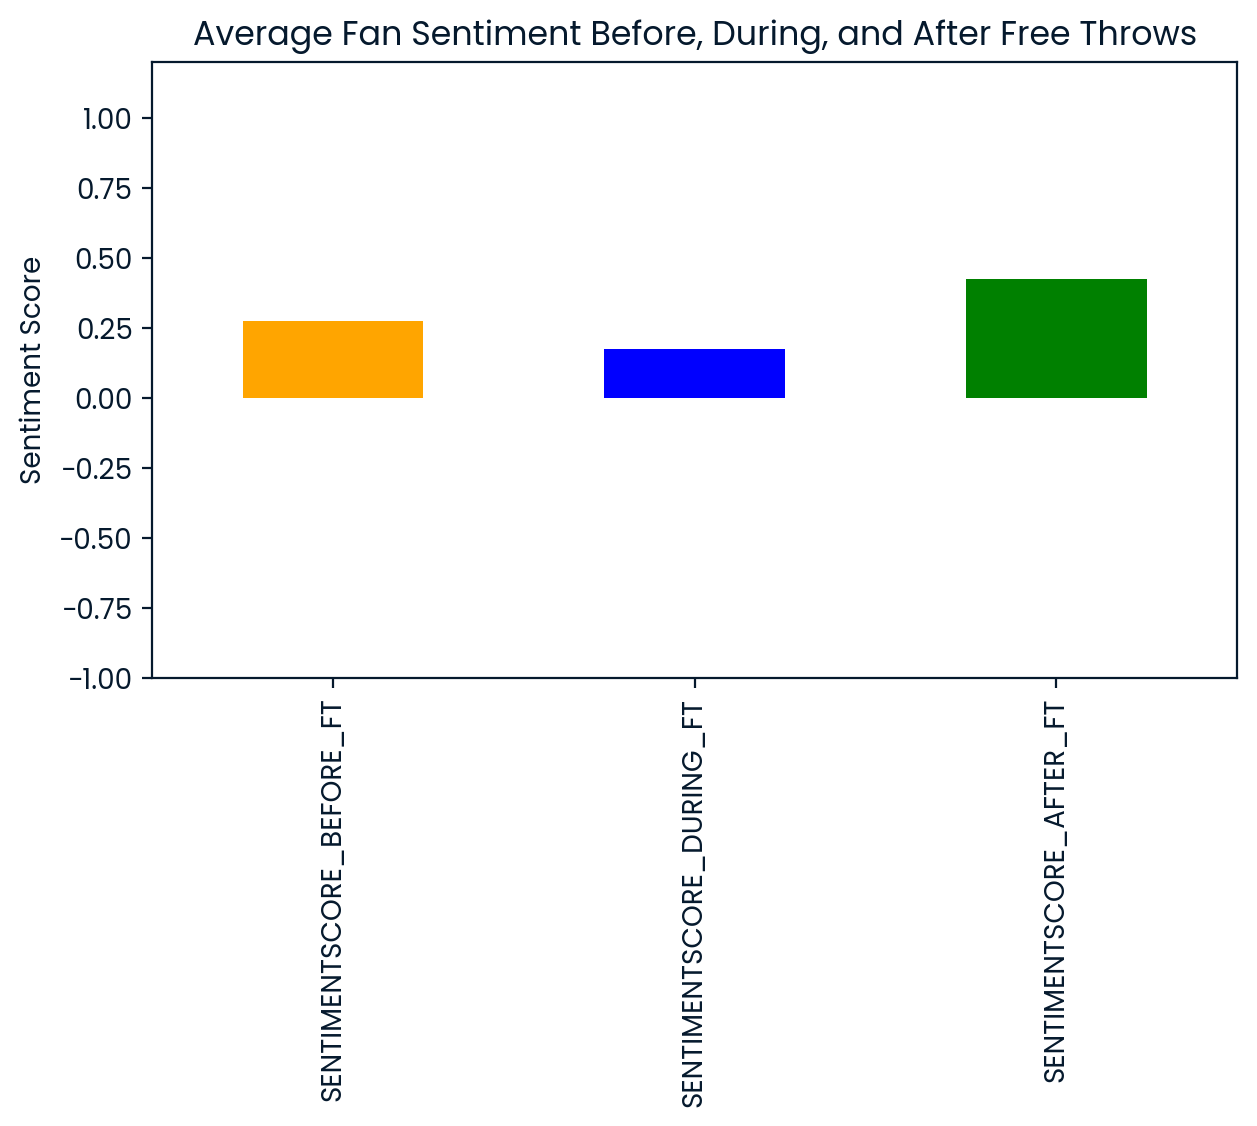


Notice how the average sentiment increases after the free throws,
which makes sense because the Bulls scored both free throws and won the game!



In [12]:
avg_sentiment = df_senti[['SENTIMENTSCORE_BEFORE_FT', 'SENTIMENTSCORE_DURING_FT', 'SENTIMENTSCORE_AFTER_FT']].mean()

print("Average Sentiment Scores:")
print(avg_sentiment)

plt.figure(figsize=(7,4))
avg_sentiment.plot(kind='bar', color=['orange', 'blue', 'green'])
plt.title('Average Fan Sentiment Before, During, and After Free Throws')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1.2)
plt.show()

print("""
Notice how the average sentiment increases after the free throws,
which makes sense because the Bulls scored both free throws and won the game!
""")



## STEP 6: Sentiment Category Counts

Let's count how many times each sentiment category was used before, during, and after.

Sentiment Category Counts:


,Before Free Throws,During Free Throws,After Free Throws
angry,1,3,5
neutral,13,12,4
very happy,6,5,11


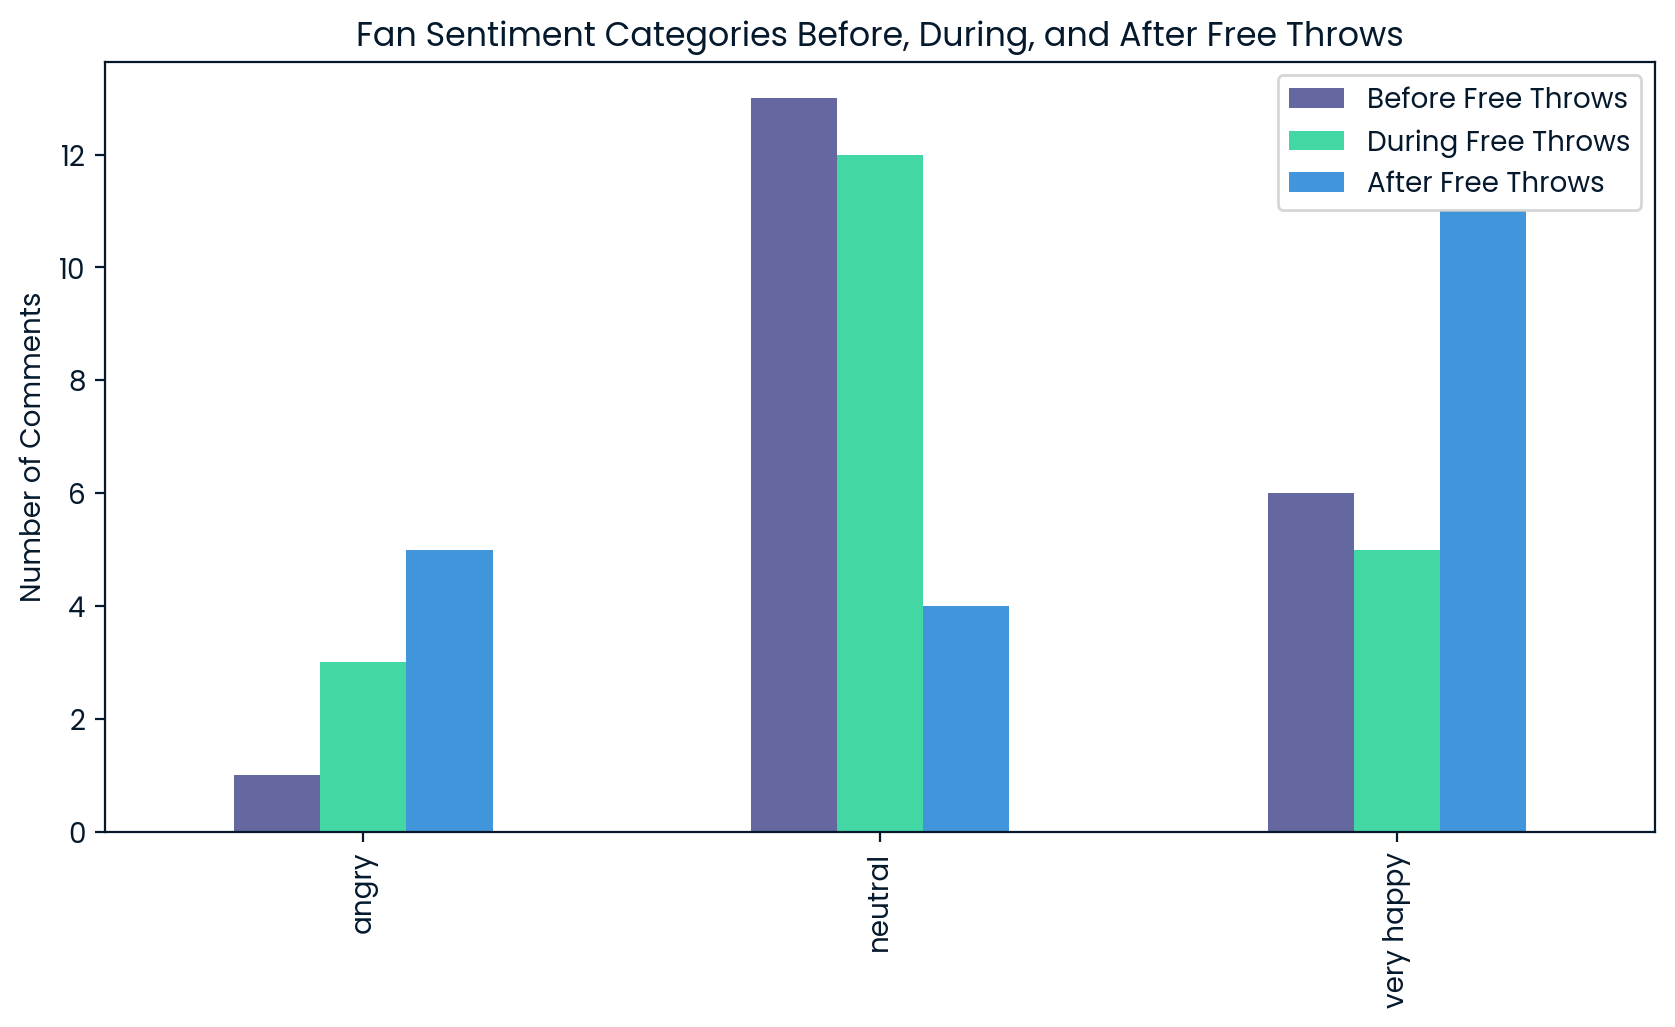


'Very happy' comments increase after the free throws,
while 'angry' comments decrease.  
Fans' feelings changed as the game ended!



In [13]:
counts_before = df_senti['SENTIMENT_BEFORE_FT'].value_counts()
counts_during = df_senti['SENTIMENT_DURING_FT'].value_counts()
counts_after = df_senti['SENTIMENT_AFTER_FT'].value_counts()

sentiment_counts = pd.DataFrame({
    'Before Free Throws': counts_before,
    'During Free Throws': counts_during,
    'After Free Throws': counts_after
}).fillna(0)

print("Sentiment Category Counts:")
display(sentiment_counts)

sentiment_counts.plot(kind='bar', figsize=(10,5))
plt.title('Fan Sentiment Categories Before, During, and After Free Throws')
plt.ylabel('Number of Comments')
plt.show()

print("""
'Very happy' comments increase after the free throws,
while 'angry' comments decrease.  
Fans' feelings changed as the game ended!
""")



## Wrap Up

Today, using Data Analytics, we:
- Collected and understood NBA and fan sentiment data
- Analyzed and visualized scores and fan emotions
- Learned how fan feelings changed during a big game moment
- Connected numbers and words to tell an exciting sports story

Great work, team!
